#### 단어 빈도 수 출력

In [2]:
import findspark
findspark.init("C:\\Users\\bulzi\\Downloads\\spark-2.0.0-bin-hadoop2.6")

In [1]:
%%writefile data/ds_spark_wiki_overview.txt
Overview[edit]
Apache Spark provides programmers with an application programming interface centered on a data structure called the resilient distributed dataset (RDD), a read-only multiset of data items distributed over a cluster of machines, that is maintained in a fault-tolerant way.[2] It was developed in response to limitations in the MapReduce cluster computing paradigm, which forces a particular linear dataflow structure on distributed programs: MapReduce programs read input data from disk, map a function across the data, reduce the results of the map, and store reduction results on disk. Spark's RDDs function as a working set for distributed programs that offers a (deliberately) restricted form of distributed shared memory.[3]

The availability of RDDs facilitates the implementation of both iterative algorithms, that visit their dataset multiple times in a loop, and interactive/exploratory data analysis, i.e., the repeated database-style querying of data. The latency of such applications (compared to a MapReduce implementation, as was common in Apache Hadoop stacks) may be reduced by several orders of magnitude.[2][4] Among the class of iterative algorithms are the training algorithms for machine learning systems, which formed the initial impetus for developing Apache Spark.[5]

Apache Spark requires a cluster manager and a distributed storage system. For cluster management, Spark supports standalone (native Spark cluster), Hadoop YARN, or Apache Mesos.[6] For distributed storage, Spark can interface with a wide variety, including Hadoop Distributed File System (HDFS),[7] MapR File System (MapR-FS),[8] Cassandra,[9] OpenStack Swift, Amazon S3, Kudu, or a custom solution can be implemented. Spark also supports a pseudo-distributed local mode, usually used only for development or testing purposes, where distributed storage is not required and the local file system can be used instead; in such a scenario, Spark is run on a single machine with one executor per CPU core.

Writing data/ds_spark_wiki_overview.txt


In [14]:
import pyspark
import os
myConf = pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master('local').appName('myApp').config(conf=myConf).getOrCreate()
filepath = os.path.join('data','ds_spark_wiki_overview.txt')
Rdd = spark.sparkContext.textFile(filepath)
print Rdd.take(1)

[u'Overview[edit]']


<type 'list'>
(17, u'a')
(11, u'the')
(10, u'of')
(8, u'distributed')
(7, u'Spark')
(6, u'in')
(5, u'Apache')
(4, u'for')
(4, u'and')
(4, u'data')
(4, u'on')
(4, u'cluster')
(3, u'with')
(3, u'is')
(3, u'Hadoop')
(3, u'be')
(3, u'MapReduce')
(3, u'or')
(3, u'can')
(3, u'that')
(2, u'local')
(2, u'which')
(2, u'supports')


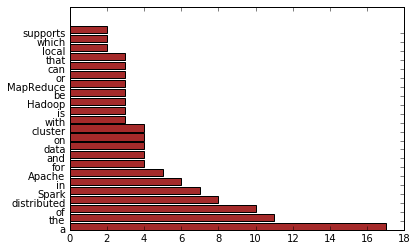

In [11]:
import pyspark
import os
myConf = pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master('local').appName('myApp').config(conf=myConf).getOrCreate()
filepath = os.path.join('data','ds_spark_wiki_overview.txt')
Rdd = spark.sparkContext.textFile(filepath)

%matplotlib inline
import matplotlib.pyplot as plt

wc2 = Rdd.flatMap(lambda x:x.split()).map(lambda x:(x,1)).reduceByKey(lambda x,y:x+y).map(lambda x:(x[1],x[0])).sortByKey(False).take(23)
print type(wc2)
for i in wc2:
    print i

count = map(lambda x: x[0], wc2)
word = map(lambda x: x[1], wc2)
plt.barh(range(len(count)), count, color = 'brown')
plt.yticks(range(len(count)), word)
plt.show()